<a href="https://colab.research.google.com/github/justynamatejkowska/wizualizacja_py/blob/main/Wizualizacja_py_Matejkowska_Lewandowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projekt zaliczeniowy
## **Wizualizacja danych sprzedażowych sieci sklepów *Drogeria* w języku Python tekst**
#Na podstawie analizy najbardziej dochodowych sklepów *Drogeria*
##### Autorzy: Katarzyna Lewandowska, Justyna Matejkowska

# Przygotowanie środowiska

Import pakietów

In [66]:
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np

Wczytanie danych

In [67]:
# przykladowy sposb odczytu z pliku lezacego pod sciezka /2021-selected-rates.csv
url = 'https://raw.githubusercontent.com/justynamatejkowska/wizualizacja_py/main/d_shops.csv'
response = requests.get(url)
open("/d_shops.csv", "wb").write(response.content)

991849

Wczytanie tabeli z danych

In [68]:
shops = pd.read_csv('/d_shops.csv')

Deklaracja kolorów

In [69]:
COLOR_1 = '#a1c9f4' 
COLOR_2 = '#8de5a1' 
COLOR_3 = '#ff9f9b'
COLOR_4 = '#d0bbff'
COLOR_5 = '#debb9b'
COLOR_6 = '#fab0e4'
COLOR_7 = '#cfcfcf'
COLOR_8 = '#fffea3'
COLOR_9 = '#b9f2f0'


# *Drogeria* vs konkurencja


Przygotowanie danych do wykresu 1. - tabela przestawna, suma sprzedaży 5 najbardziej dochodowych *Drogerii* oraz konkurencji

In [72]:
shops
values = ['sprzedaz','liczba_klientow','sklep_konkurencja']
top_5 = shops.pivot_table(index = 'sklep_id', values = values, aggfunc='sum').nlargest(5,'sprzedaz')

top_5.rename(columns={'sprzedaz': 'suma_sprzedazy', 'liczba_klientow':'klienci', 'sklep_konkurencja': 'konkurencja'}, inplace=False)

,klienci,konkurencja,suma_sprzedazy
sklep_id,,,
42,337339,105850,3132357
25,419902,156950,3004443
4,405758,226300,2971989
35,222661,2795900,2946316
27,325933,21900,2891329


Wykres 1. - porównanie 5 sklepów *Drogeria*, które charakteryzują się się największą dochodowością wśród wszystkich sklepów *Drogeria*

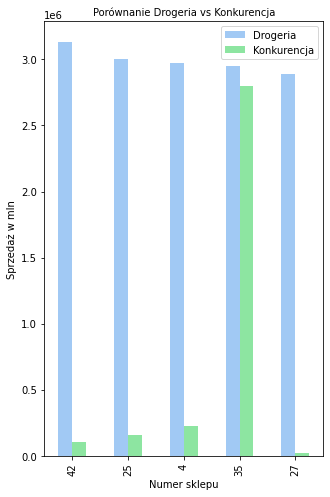

In [73]:
y=['sprzedaz','sklep_konkurencja']
color=[COLOR_1, COLOR_2 ]

plt.rcParams["figure.figsize"] = (5,8) #zmiana rozmiaru
fig1 = top_5.plot.bar(y=y, color=color) #stworzenie wykresu

fig1.set_ylabel('Sprzedaż w mln', color='black', fontsize=10)
fig1.set_xlabel('Numer sklepu',color='black', fontsize=10)
fig1.set_title('Porównanie Drogeria vs Konkurencja',color='black', fontsize=10)
fig1.legend(['Drogeria','Konkurencja'], loc = 0)
plt.show()

#Rozkład sprzedaży i klientów w sklepach *Drogeria*

Przygotowanie danych do wykresu 4. - odfiltrowanie 5 najbardziej dochodowych sklepów

In [70]:
shops_ids = [42, 35, 25, 4, 27]
shops_open = []

for id in shops_ids:
    shop = shops[(shops.sklep_id == id) & (shops.czy_otwarty == 'Tak')]
    shops_open.append(shop)

shops4 = pd.concat(shops_open)

shops4

,sklep_id,dzien_tyg,data,sprzedaz,liczba_klientow,czy_otwarty,czy_promocja,czy_swieto,czy_swieto_szkolne,sklep_typ,sklep_asort,sklep_konkurencja
35,42,3,31.12.2021,7395,780,Tak,Nie,Nie,Tak,a,Rozszerzony,290
78,42,2,30.12.2021,13334,1324,Tak,Nie,Nie,Tak,a,Rozszerzony,290
121,42,1,29.12.2021,11385,1140,Tak,Nie,Nie,Tak,a,Rozszerzony,290
207,42,6,27.12.2021,7072,792,Tak,Nie,Nie,Nie,a,Rozszerzony,290
336,42,3,24.12.2021,7297,812,Tak,Nie,Nie,Tak,a,Rozszerzony,290
...,...,...,...,...,...,...,...,...,...,...,...,...
16638,27,2,07.01.2021,15092,1457,Tak,Tak,Nie,Tak,a,Podstawowy,60
16688,27,1,06.01.2021,15650,1449,Tak,Tak,Nie,Tak,a,Podstawowy,60
16788,27,6,04.01.2021,7413,913,Tak,Nie,Nie,Nie,a,Podstawowy,60
16838,27,5,03.01.2021,8297,1093,Tak,Nie,Nie,Tak,a,Podstawowy,60


Wykres 4. - rozkład sprzedaży, liczby klientów w 5 najbardziej dochodowych sklepach w 2021 roku

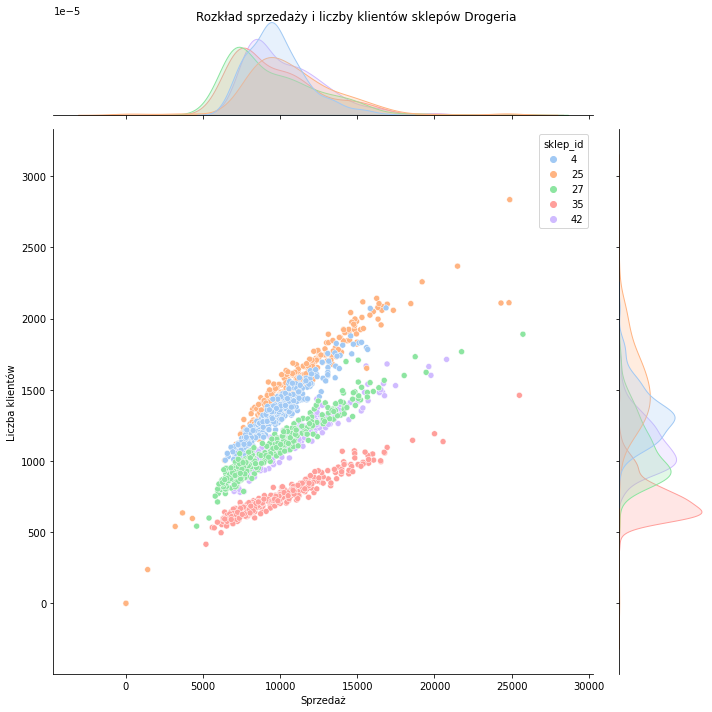

In [71]:
p4 = sns.jointplot(data = shops4, x="sprzedaz", y="liczba_klientow", hue="sklep_id", height = 10, palette = "pastel")
p4.fig.suptitle('Rozkład sprzedaży i liczby klientów sklepów Drogeria')
p4.set_axis_labels('Sprzedaż','Liczba klientów')
p4.fig.tight_layout()

plt.show()

# Sprzedaż vs święta

Przygotowanie danych dla wykresu 5. - zmergowanie danych dotyczących wystąpienia świąt, stworzenie tabeli przestawnej

In [74]:
shops5 = shops

holidays = ['Narodowe', 'Wielkanoc', 'Boże Narodzenie']
for holiday in holidays:
    shops5['czy_swieto'] = shops5['czy_swieto'].replace([holiday], 'Tak')

df5 = pd.pivot_table(shops5, index = ['sklep_id'], columns = ['czy_swieto'], values = ['sprzedaz'], aggfunc='sum')

df5.loc[:,'Suma'] = df5.sum(numeric_only = True, axis = 1)
df5.sort_values(['Suma'], ascending = False, inplace=True)

Wykres 5 - wpływ sprzedaży w święta na sprzedaż sklepów *Drogeria* ogółem

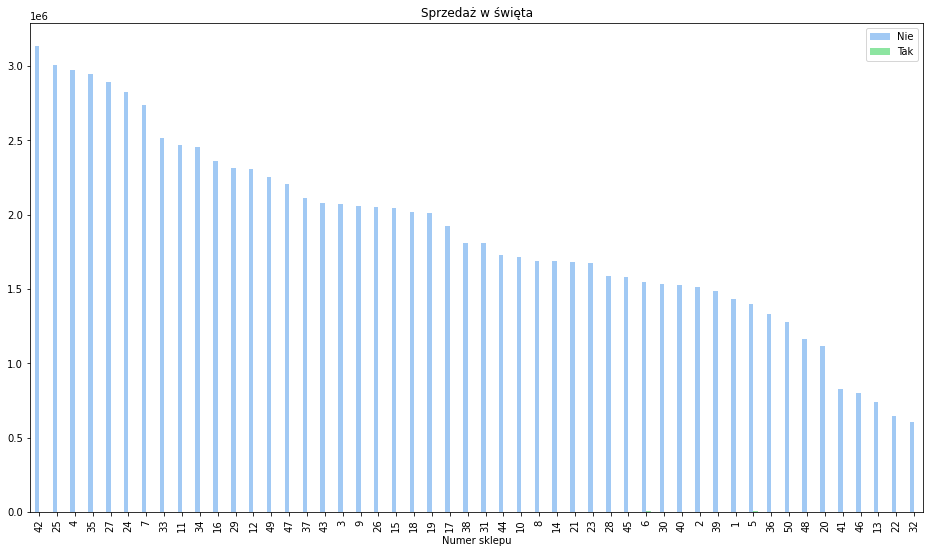

In [75]:
plt.rcParams["figure.figsize"] = (16,9)
y5 = ['sprzedaz']
df5.plot.bar(y=y5, color=color, legend=True) #stworzenie wykresu

L = plt.legend()
L.get_texts()[0].set_text('Nie')
L.get_texts()[1].set_text('Tak')
plt.title('Sprzedaż w święta')
plt.gca().set_xlabel('Numer sklepu')

plt.show()

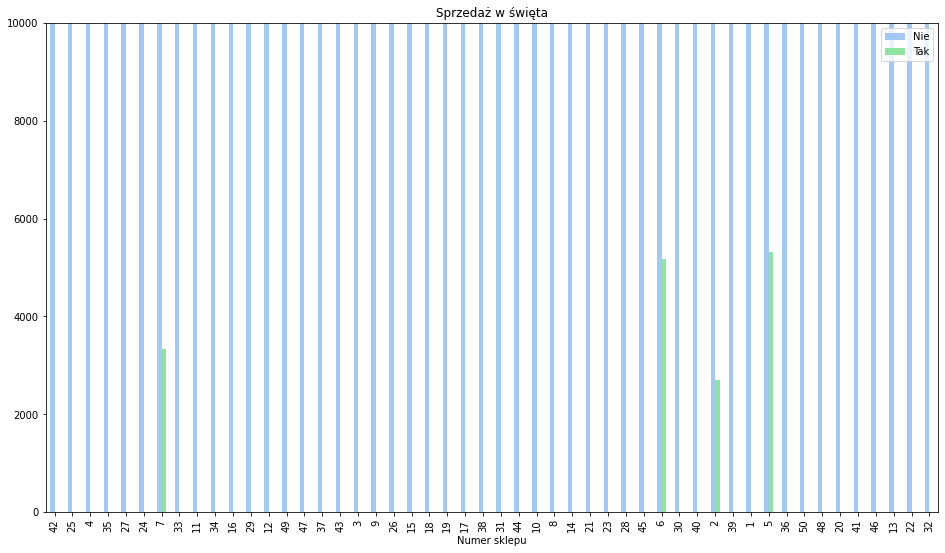

In [76]:
plt.rcParams["figure.figsize"] = (16,9)
y5 = ['sprzedaz']
df5.plot.bar(y=y5, color=color) #stworzenie wykresu
plt.ylim(0, 10000)

L = plt.legend()
L.get_texts()[0].set_text('Nie')
L.get_texts()[1].set_text('Tak')
plt.title('Sprzedaż w święta')
plt.gca().set_xlabel('Numer sklepu')


plt.show()

#Sprzedaż sklepu numer 42

 Przygotowanie danych do wykresu 2. - tabela przestawna, sprzedaż miesięczna poszczególnych sklepów

In [77]:
shops1 = shops
shops1.data = pd.to_datetime(shops.data)
shops1.data = shops.data.dt.strftime('%Y-%m')

shops1_piv = pd.pivot_table(shops1, index=['sklep_id'], values = 'sprzedaz', aggfunc='sum',columns=['data'])
shops1_piv

data,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
sklep_id,,,,,,,,,,,,
1,124752,112304,123298,125109,121069,114599,123587,114985,93960,117854,124040,137851
2,123094,117836,139718,135100,129094,130556,132008,121981,113286,123067,118331,132361
3,167404,161273,195013,186253,173379,185130,184589,160696,146982,164979,166570,180681
4,251968,228101,255638,251904,248895,244084,250175,261480,206579,254818,249062,269285
5,116548,110625,123589,125994,120675,120922,126286,111439,101458,113520,110728,124681
6,130800,122284,142915,140897,137123,132323,133692,121957,109396,125252,126647,130461
7,219561,209923,231837,246559,229725,229195,261589,244560,191941,221194,223086,228213
8,138968,130170,148415,146625,139897,144354,142758,131039,127580,151527,149339,139028
9,168729,159990,179524,173960,175625,174490,174498,170581,145279,177682,174250,179887


Wykres 2. - sprzedaż i liczba klientów sklepu *Drogeria* nr 42

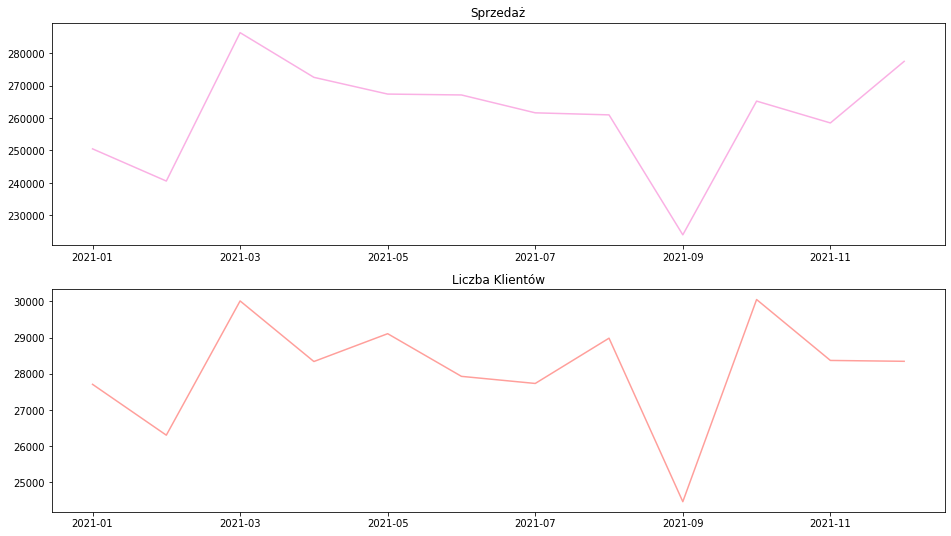

In [78]:
def plot_sales_and_customers(df):
  
    fig, (ax1, ax2) = plt.subplots(2, 1)
    df['sprzedaz'].plot(kind='line', ax=ax1, color = COLOR_6)
    ax1.set_title('Sprzedaż')
    ax1.set_xlabel('')

    df['liczba_klientow'].plot(kind='line', ax=ax2, color = COLOR_3)
    ax2.set_title('Liczba Klientów')
    ax2.set_xlabel('')

    plt.show()

plot_sales_and_customers(sklep_42)    

#Promocja vs sprzedaż

Przygotowanie danych do wykresu 3. - odfiltowanie wartości >0 oraz najbardziej dochodowego sklepu

In [79]:
shops3 = shops[(shops.sklep_id == 42 ) & (shops.czy_otwarty == 'Tak') ]

Wykres 3. - sprzedaż w ujęciu tygodniowym w zależności od wprowadzenia promocji

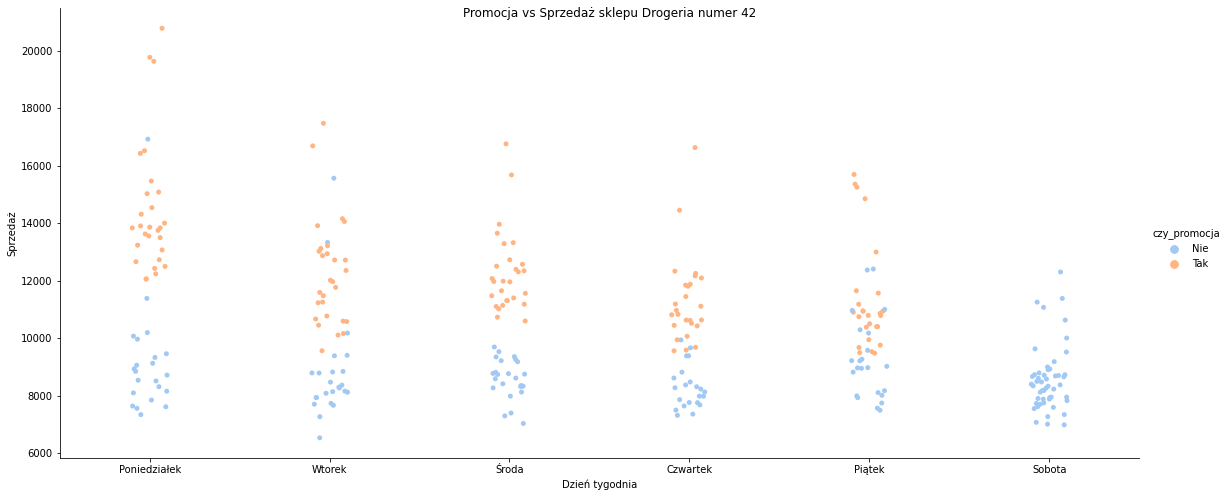

In [80]:
with sns.color_palette("pastel"):
  fig3 = sns.catplot(data = shops3, x = 'dzien_tyg', y = 'sprzedaz', hue = 'czy_promocja', height = 7, aspect =2.3)
  fig3.set_xticklabels(['Poniedziałek','Wtorek','Środa','Czwartek','Piątek','Sobota'])
  fig3.set_axis_labels('Dzień tygodnia','Sprzedaż')
  fig3.set_titles(template ='Wpływ promacji na sprzedaż wg dnia tygodnia')
  fig3.fig.suptitle('Promocja vs Sprzedaż sklepu Drogeria numer 42')
plt.show()


#Zależność między promocją a liczbą klientów w sklepie numr 42 


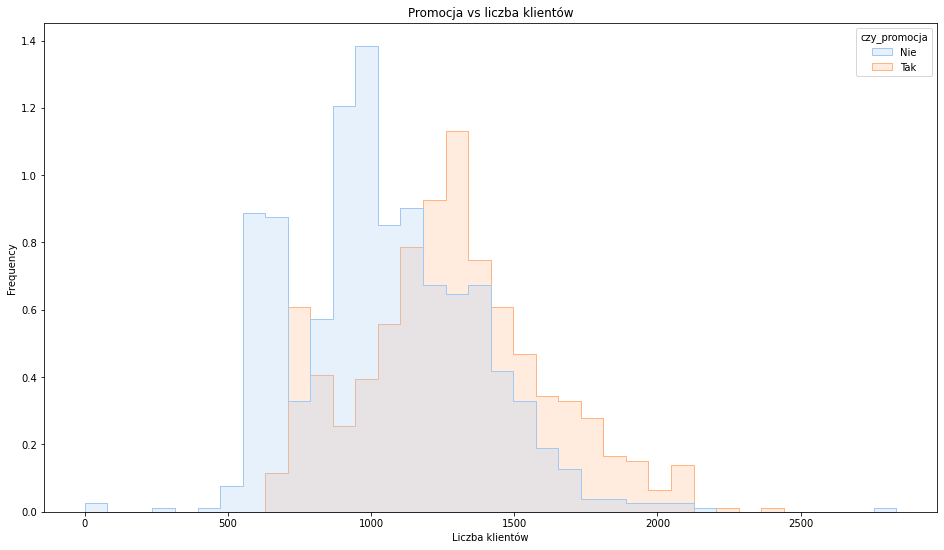

In [81]:
p6 = sns.histplot(shops4, x='liczba_klientow', hue = 'czy_promocja', element="step", stat="frequency", common_norm=False, palette = 'pastel')
p6.set(xlabel='Liczba klientów', title='Promocja vs liczba klientów')
plt.show()

# Sprzedaż vs dzień tygodnia

Przygotowanie danych do wykresu 7. - odfiltrowanie wartości 0> oraz sklepu numer 42, stworzenie tabeli przestawnej sumującej sprzedaż w poszczególne dni tygodnia

In [82]:
shops7 = shops3

shops7 = shops[(shops.sklep_id == 42 ) & (shops.czy_otwarty == 'Tak') ]
df7 = pd.pivot_table(shops7, index = ['sklep_id'], columns = ['dzien_tyg'], values = ['sprzedaz'], aggfunc='mean')
df7.transpose()

sklep_id                      42
         dzien_tyg              
sprzedaz 1          12122.260000
         2          10679.019231
         3          10580.423077
         4           9924.958333
         5          10353.816327
         6           8568.980392

Wykres 7. - średnia sprzedaż dla sklepu *Drogeria* numer 42 wg dni tygodnia

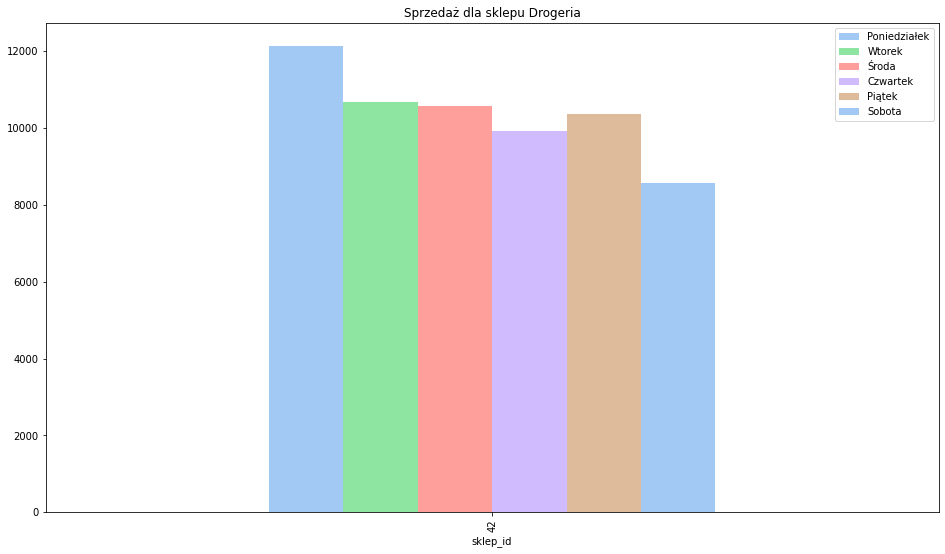

In [83]:
plt.rcParams["figure.figsize"] = (16,9)
fig7 = df7.plot.bar(y='sprzedaz', color = [COLOR_1, COLOR_2, COLOR_3, COLOR_4, COLOR_5])
plt.title('Sprzedaż dla sklepu Drogeria')
plt.xlabel = ('Numer sklepu')
plt.ylabel  = ('Sprzedaż')

L = plt.legend()
L.get_texts()[0].set_text('Poniedziałek')
L.get_texts()[1].set_text('Wtorek')
L.get_texts()[2].set_text('Środa')
L.get_texts()[3].set_text('Czwartek')
L.get_texts()[4].set_text('Piątek')
L.get_texts()[5].set_text('Sobota')